In [1]:
import qrpm_funcs as qf
import numpy as np
seriesnames=['DGS1MO','DGS3MO','DGS6MO','DGS1','DGS2', \
             'DGS3','DGS5','DGS7','DGS10','DGS20','DGS30']
maturities=qf.TenorsFromNames(seriesnames)
lastday=qf.LastYearEnd()
firstday=qf.LastYearEnd(int(lastday[:4])-1)
dates_dirty,prices_dirty=qf.GetFREDMatrix(seriesnames, \
            startdate=firstday,enddate=lastday)
#remove no-data periods
nan_list=[any(np.isnan(p)) for p in prices_dirty]
prices=[prices_dirty[i] for i in range(len(prices_dirty)) if not nan_list[i]]
dates=[dates_dirty[i] for i in range(len(dates_dirty)) if not nan_list[i]]


In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame(prices, index=dates, columns=seriesnames)

In [4]:
df

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
2020-12-31,0.08,0.09,0.09,0.10,0.13,0.17,0.36,0.65,0.93,1.45,1.65
2021-01-04,0.09,0.09,0.09,0.10,0.11,0.16,0.36,0.64,0.93,1.46,1.66
2021-01-05,0.08,0.09,0.09,0.10,0.13,0.17,0.38,0.66,0.96,1.49,1.70
2021-01-06,0.09,0.09,0.09,0.11,0.14,0.20,0.43,0.74,1.04,1.60,1.81
2021-01-07,0.09,0.09,0.09,0.11,0.14,0.22,0.46,0.78,1.08,1.64,1.85
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.04,0.06,0.21,0.33,0.76,0.98,1.26,1.41,1.48,1.92,1.88
2021-12-28,0.03,0.06,0.20,0.39,0.74,0.99,1.27,1.41,1.49,1.94,1.90
2021-12-29,0.01,0.05,0.19,0.38,0.75,0.99,1.29,1.47,1.55,2.00,1.96
2021-12-30,0.06,0.05,0.19,0.38,0.73,0.98,1.27,1.44,1.52,1.97,1.93


In [5]:
df_ddc = (df - df.shift(1)).dropna()

In [6]:
cov_matrix = df_ddc.cov()

In [7]:
cov_matrix

,DGS1MO,DGS3MO,DGS6MO,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS20,DGS30
DGS1MO,0.000161,0.000012,0.000020,0.000018,-0.000003,-0.000013,-0.000020,-0.000027,-0.000050,-0.000069,-0.000067
DGS3MO,0.000012,0.000064,0.000019,0.000010,0.000015,0.000026,0.000030,0.000024,0.000030,0.000013,0.000021
DGS6MO,0.000020,0.000019,0.000078,0.000016,0.000033,0.000028,0.000035,0.000032,0.000021,0.000019,0.000014
DGS1,0.000018,0.000010,0.000016,0.000132,0.000124,0.000158,0.000176,0.000174,0.000147,0.000139,0.000119
DGS2,-0.000003,0.000015,0.000033,0.000124,0.000550,0.000562,0.000665,0.000621,0.000514,0.000411,0.000336
DGS3,-0.000013,0.000026,0.000028,0.000158,0.000562,0.000831,0.000997,0.000979,0.000862,0.000736,0.000641
DGS5,-0.000020,0.000030,0.000035,0.000176,0.000665,0.000997,0.001480,0.001539,0.001424,0.001307,0.001151
DGS7,-0.000027,0.000024,0.000032,0.000174,0.000621,0.000979,0.001539,0.001779,0.001722,0.001661,0.001514
DGS10,-0.000050,0.000030,0.000021,0.000147,0.000514,0.000862,0.001424,0.001722,0.001831,0.001818,0.001731
DGS20,-0.000069,0.000013,0.000019,0.000139,0.000411,0.000736,0.001307,0.001661,0.001818,0.002023,0.001922


In [8]:
X = cov_matrix

In [9]:
X_centered = X - X.mean(axis = 0)
U, s, Vt = np.linalg.svd(X_centered)

In [10]:
sum(s[0:3])/sum(s)

0.9359252946554417

In [11]:
s

array([5.59922257e-03, 1.15536517e-03, 2.03018215e-04, 1.13542491e-04,
       9.52681748e-05, 8.55948533e-05, 6.36825149e-05, 4.83790078e-05,
       4.31694405e-05, 2.66905859e-05, 4.84219486e-20])

In [12]:
W3 = Vt.T[:, :3]

In [13]:
res_df = pd.DataFrame(W3, columns= ["PC1", "PC2", "PC3"])

<AxesSubplot:>

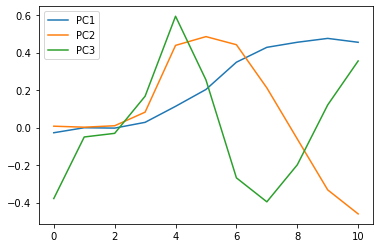

In [14]:
res_df.plot()

<AxesSubplot:>

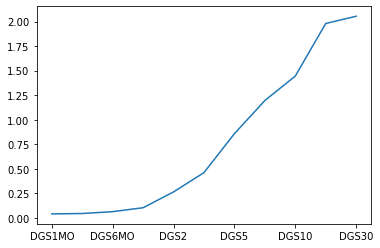

In [15]:
df.mean(axis =0).plot()

In [16]:
df.iloc[-1,:]

DGS1MO    0.06
DGS3MO    0.06
DGS6MO    0.19
DGS1      0.39
DGS2      0.73
DGS3      0.97
DGS5      1.26
DGS7      1.44
DGS10     1.52
DGS20     1.94
DGS30     1.90
Name: 2021-12-31, dtype: float64

In [17]:
from scipy.interpolate import interp1d

In [18]:
X = df.iloc[-1,:].values
X

array([0.06, 0.06, 0.19, 0.39, 0.73, 0.97, 1.26, 1.44, 1.52, 1.94, 1.9 ])

In [19]:
Y = np.array([1, 3, 6, 12, 24, 36, 60, 84, 120, 240 ,360])
Y

array([  1,   3,   6,  12,  24,  36,  60,  84, 120, 240, 360])

In [20]:
y_interp = interp1d(Y, X)

In [21]:
Xs = np.linspace(1,360, 360)
Ys = y_interp(Xs)

<AxesSubplot:>

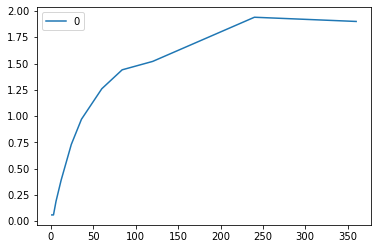

In [22]:
pd.DataFrame(Ys, index = Xs).plot()

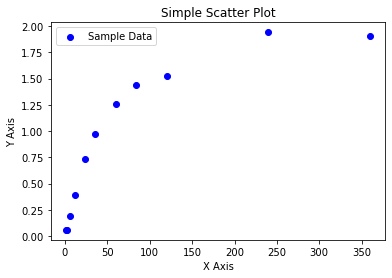

In [23]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(Y, X, color='blue', marker='o', label='Sample Data')

# Title and labels
plt.title('Simple Scatter Plot')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()

# Display the plot
plt.show()

In [24]:

f = Xs/12

In [25]:
from scipy.optimize import fmin

In [26]:
def objective_func(parameters, _print = False):
    β0 = parameters[0]
    β1 = parameters[1]
    β2 = parameters[2]
    tau = parameters[3]
    Ys_fit =(β0)+(β1 * (tau/f) * ((1-np.exp(-f/tau)))) \
            +(β2 * (tau/f) * (1 - np.exp(-f/tau)*(1 + f/tau)))
    residuals = np.sum(np.abs(Ys - Ys_fit))
    if _print:
        print("[β0, β1, β2, λ]=",parameters,", SUM:", residuals)
    return(residuals)
    
parameters = fmin(objective_func, [0.001, 0.001, 0.001, 0.01])

Optimization terminated successfully.
         Current function value: 15.311537
         Iterations: 333
         Function evaluations: 569


In [27]:
parameters

array([ 2.07475501, -2.01698001,  0.74614202,  3.41640624])

In [28]:
β0 = parameters[0]
β1 = parameters[1]
β2 = parameters[2]
tau = parameters[3]

In [29]:
Ys_fit =(β0)+(β1 * (tau/f) * ((1-np.exp(-f/tau)))) \
            +(β2 * (tau/f) * (1 - np.exp(-f/tau)*(1 + f/tau)))

In [30]:
residuals = np.sum(np.abs(Ys - Ys_fit))

<AxesSubplot:>

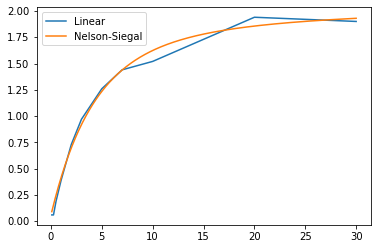

In [31]:
pd.DataFrame({"Linear" : Ys, "Nelson-Siegal" : Ys_fit}, index=f).plot()

In [32]:
f = 1000000000000000
(β0)+(β1 * (tau/f) * ((1-np.exp(-f/tau)))) \
            +(β2 * (tau/f) * (1 - np.exp(-f/tau)*(1 + f/tau)))

2.074755005619158